# Data Exploration 
1. Data format in training and submission files
2. Visual analysis of label distribution in the train set
3. Combinations of target classes
4. Image Channels


## 1. Data format in training and submission files

In [12]:
!pip install ipyplot -q


import pandas as pd
import numpy as np
from fastai.vision.all import *
import ipyplot
import imageio
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import the train file and the submission file
path = Path('../input/hpa-single-cell-image-classification')
df_train = pd.read_csv(path/'train.csv')
df_sub = pd.read_csv(path/'sample_submission.csv')

# train file format
df_train.head()

ID  Label
0  5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0  8|5|0
1  5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0   14|0
2  60b57878-bb99-11e8-b2b9-ac1f6b6435d0    6|1
3  5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0  16|10
4  5b931256-bb99-11e8-b2b9-ac1f6b6435d0   14|0

In [13]:
# train images info
train_path = path/'train'
train_images = train_path.ls()
len(df_train), len(train_images)

(21806, 87224)

In [14]:
# submission file format
df_sub.head()

ID  ImageWidth  ImageHeight  \
0  0040581b-f1f2-4fbe-b043-b6bfea5404bb        2048         2048   
1  004a270d-34a2-4d60-bbe4-365fca868193        2048         2048   
2  00537262-883c-4b37-a3a1-a4931b6faea5        2048         2048   
3  00c9a1c9-2f06-476f-8b0d-6d01032874a2        2048         2048   
4  0173029a-161d-40ef-af28-2342915b22fb        3072         3072   

           PredictionString  
0  0 1 eNoLCAgIMAEABJkBdQ==  
1  0 1 eNoLCAgIMAEABJkBdQ==  
2  0 1 eNoLCAgIMAEABJkBdQ==  
3  0 1 eNoLCAgIMAEABJkBdQ==  
4  0 1 eNoLCAgIsAQABJ4Beg==

## 2. Visual analysis of label distribution in the train set

In [15]:
all_labels = df_train.Label.unique().tolist()
all_labels = '|'.join(all_labels)
all_labels = all_labels.split('|')
all_labels = list(set(all_labels))
num_unique_labels = len(all_labels)
all_labels = sorted(all_labels, key=int)
all_labels = ' '.join(all_labels)
print(f'{num_unique_labels} unique labels, values: {all_labels}')

19 unique labels, values: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18


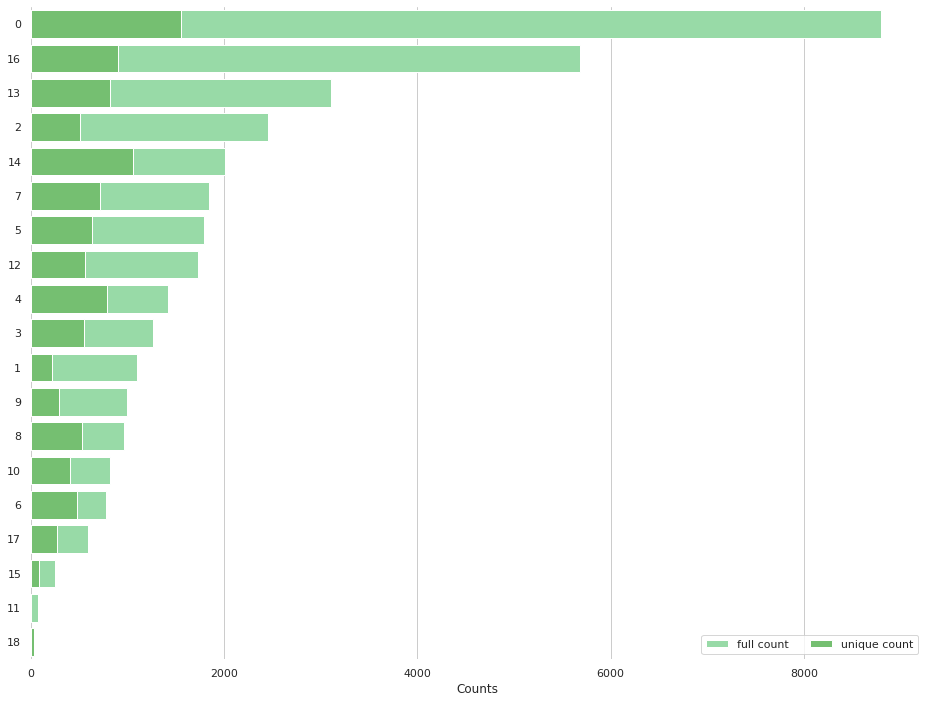

In [16]:
labels = [str(i) for i in range(19)]

unique_counts = {}
for lbl in labels:
    unique_counts[lbl] = len(df_train[df_train.Label == lbl])

full_counts = {}
for lbl in labels:
    count = 0
    for row_label in df_train['Label']:
        if lbl in row_label.split('|'): count += 1
    full_counts[lbl] = count
    
counts = list(zip(full_counts.keys(), full_counts.values(), unique_counts.values()))
counts = np.array(sorted(counts, key=lambda x:-x[1]))
counts = pd.DataFrame(counts, columns=['label', 'full_count', 'unique_count'])

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(16, 12))

sns.set_color_codes("pastel")

counts['full_count'] = counts['full_count'].astype('float')
counts['unique_count'] = counts['unique_count'].astype('float')

sns.barplot(x= "full_count", y="label", data= counts, color="g", orient = 'h', label="full count")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="unique_count", y="label", data=counts, order=counts.label.values,
            label="unique count", color="g", orient = 'h')

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Counts")
sns.despine(left=True, bottom=True)

In [17]:
labels

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18']

The names and descriptions of these labels is:

| Label | Name | Description |
|-|-|-|
| 0. | Nucleoplasm | The nucleus is found in the center of cell and can be identified with the help of the signal in the blue nucleus channel. A staining of the nucleoplasm may include the whole nucleus or of the nucleus without the regions known as nucleoli (Class 2). |
| 1. | Nuclear membrane | The nuclear membrane appears as a thin circle around the nucleus. It is not perfectly smooth and sometimes it is also possible to see the folds of the membrane as small circles or dots inside the nucleus. |
| 2. | Nucleoli | Nucleoli can be seen as slightly elongated circular areas in the nucleoplasm, which usually display a much weaker staining in the blue DAPI channel. The number and size of nucleoli varies between cell types. |
| 3. | Nucleoli fibrillar center | Nucleoli fibrillary center can appear as a spotty cluster or as a single bigger spot in the nucleolus, depending on the cell type. |
| 4. | Nuclear speckles | Nuclear speckles can be seen as irregular and mottled spots inside the nucleoplasm. |
| 5. | Nuclear bodies | Nuclear bodies are visible as distinct spots in the nucleoplasm. They vary in shape, size and numbers depending on the type of bodies as well as cell type, but are usually more rounded compared to nuclear speckles. |
| 6. | Endoplasmic reticulum | The endoplasmic reticulum (ER) is recognized by a network-like staining in the cytosol, which is usually stronger close to the nucleus and weaker close to the edges of the cell. The ER can be identified with the help of the staining in the yellow ER channel. |
| 7. | Golgi apparatus | The Golgi apparatus is a rather large organelle that is located next to the nucleus, close to the centrosome, from which the microtubules in the red channel originate. It has a folded ribbon-like appearance, but the shape and size can vary between cell types, and in response to cellular various processes. |
| 8. | Intermediate filaments | Intermediate filaments often exhibit a slightly tangled structure with strands crossing every so often. They can appear similar to microtubules, but do not match well with the staining in the red microtubule channel. Intermediate filaments may extend through the whole cytosol, or be concentrated in an area close to the nucleus. |
| 9. | Actin filaments | Actin filaments can be seen as long and rather straight bundles of filaments or as branched networks of thinner filaments. They are usually located close to the edges of the cells. |
| 10. | Microtubules | Microtubules are seen as thin strands that stretch throughout the whole cell. It is almost always possible to detect the center from which they all originate (the centrosome). And yes, as you might have guessed, this overlaps the staining in the red channel. |
| 11. | Mitotic spindle | The mitotic spindle can be seen as an intricate structure of microtubules radiating from each of the centrosomes at opposite ends of a dividing cell (mitosis). At this stage, the chromatin of the cell is condensed, as visible by intense DAPI staining. The size and exact shape of the mitotic spindle changes during mitotic progression, clearly reflecting the different stages of mitosis. |
| 12. | Centrosome | This class includes centrosomes and centriolar satellites. They can be seen as a more or less distinct staining of a small area at the origin of the microtubules, close to the nucleus. When a cell is dividing, the two centrosomes move to opposite ends of the cell and form the poles of the mitotic spindle. |
| 13. | Plasma membrane | This class includes plasma membrane and cell junctions. Both are at the outer edge of the cell. Plasma membrane sometimes appears as a more or less distinct edge around the cell, occasionally with characteristic protrusions or ruffles. In some cell lines, the staining can be uniform across the entire cell. Cell junctions can be observed at contact sites between neighboring cells. |
| 14. | Mitochondria | Mitochondria are small rod-like units in the cytosol, which are often distributed in a thread-like pattern along microtubules. |
| 15. | Aggresome | An aggresome can be seen as a dense cytoplasmic inclusion, which is usually found close to the nucleus, in a region where the microtubule network is disrupted. |
| 16. | Cytosol | The cytosol extends from the plasma membrane to the nuclear membrane. It can appear smooth or granular, and the staining is often stronger close to the nucleus. |
| 17. | Vesicles and punctate cytosolic patterns | This class includes small circular compartments in the cytosol: Vesicles, Peroxisomes (lipid metabolism), Endosomes (sorting compartments), Lysosomes (degradation of molecules or eating up dead molecules), Lipid droplets (fat storage), Cytoplasmic bodies (distinct granules in the cytosol). They are highly dynamic, varying in numbers and size in response to environmental and cellular cues. They can be round or more elongated. |
| 18. | Negative | This class include negative stainings and unspecific patterns. This means that the cells have no green staining (negative), or have staining but no pattern can be deciphered from the staining (unspecific). |

## 3. Combinations of target classes

### Unique combinations of classes and multiple labels

In [8]:
print(f'Number of unique combinations of classes in the train set: {len(df_train.Label.value_counts())}')

Number of unique combinations of classes in the train set: 432


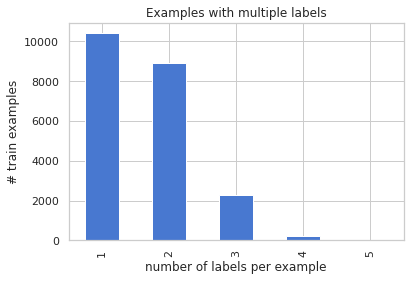

In [9]:
df_train['num_classes'] = df_train['Label'].apply(lambda r: len(r.split('|')))
df_train['num_classes'].value_counts().plot.bar(title='Examples with multiple labels', xlabel='number of labels per example', ylabel='# train examples', color="b")
plt.show()

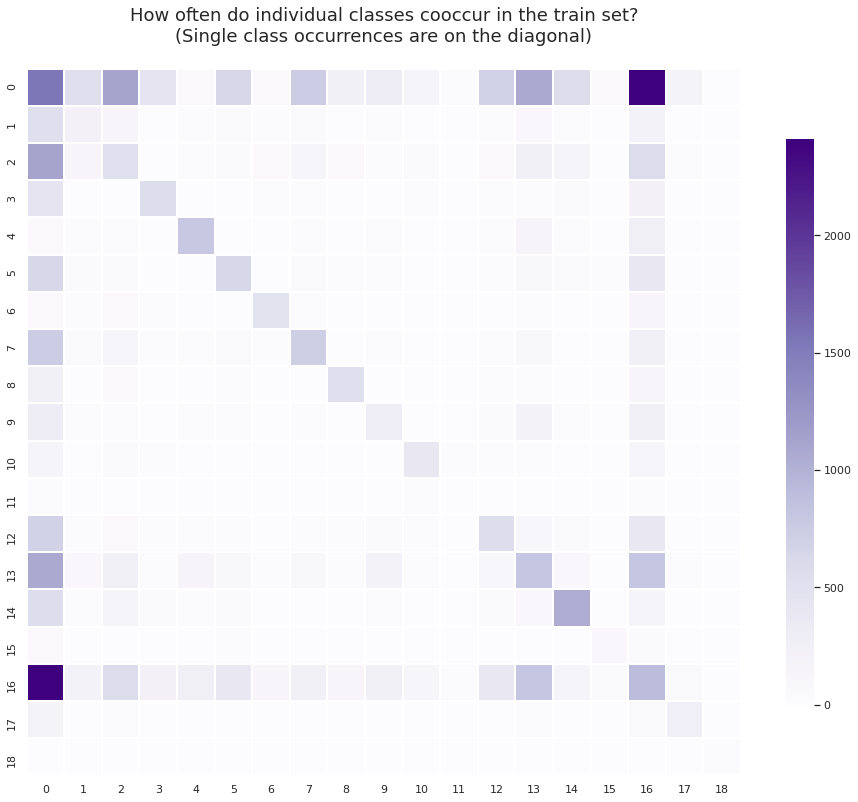

In [45]:
for x in labels: df_train[x] = df_train['Label'].apply(lambda r: int(x in r.split('|')))

df_labels = df_train[labels]
coocc = df_labels.T.dot(df_labels)
for i in range(19): coocc.iloc[i,i] = int(counts.unique_count[counts.label == str(i)].values[0])

fig, ax = plt.subplots(figsize=(16, 13))
sns.heatmap(coocc, cmap="Purples", linewidth=0.3, cbar_kws={"shrink": .8})
title = 'How often do individual classes cooccur in the train set?\n(Single class occurrences are on the diagonal)\n'
plt.title(title, loc='center', fontsize=18)
plt.show()

* We can see from the coocurrence plot that the classes 0 (nucleoplasm) and 16 (cytosol) tend to cooccur most frequently with other classes, and especially with each other. These are also the most frequent classes.



In [36]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())
train_labels = df_train

def fill_targets(row):
    row.Label = np.array(row.Label.split("|")).astype(np.int)
    for num in row.Label:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

train_labels = train_labels.apply(fill_targets ,axis = 1)
train_labels.head()

ID      Label  Nucleoplasm  \
0  5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0  [8, 5, 0]            1   
1  5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0    [14, 0]            1   
2  60b57878-bb99-11e8-b2b9-ac1f6b6435d0     [6, 1]            0   
3  5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0   [16, 10]            0   
4  5b931256-bb99-11e8-b2b9-ac1f6b6435d0    [14, 0]            1   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 0         0                          0                 0   
2                 1         0                          0                 0   
3                 0         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  Golgi apparatus  ...  9  10  11  12  \
0               1                      0                0  ...  0   0   0   0   
1               0                      0                0  ...  0   0   0   0   
2               0                      1                0  ...  0   0   0   0   
3               0                      0                0  ...  0   1   0   0   
4               0                      0                0  ...  0   0   0   0   

   13  14  15  16  17  18  
0   0   0   0   0   0   0  
1   0   1   0   0   0   0  
2   0   0   0   0   0   0  
3   0   0   0   1   0   0  
4   0   1   0   0   0   0  

[5 rows x 49 columns]

### How many targets are most common?¶

Text(0, 0.5, '% of train data')

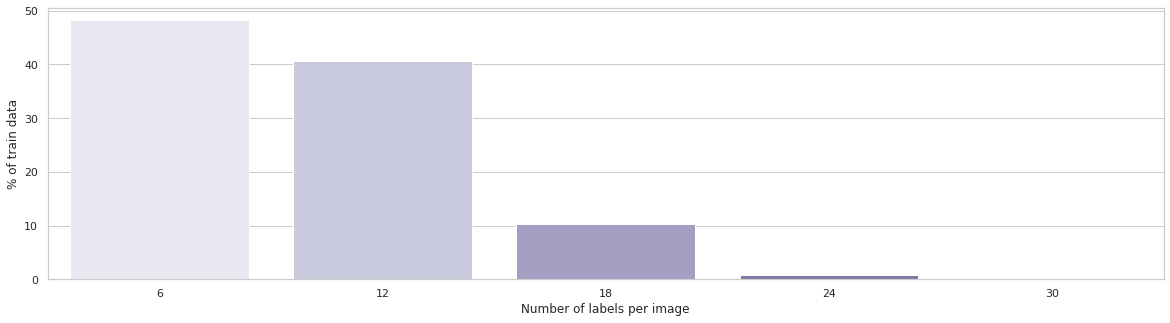

In [40]:
train_labels["number_of_targets"] = train_labels.drop(["ID", "Label"],axis=1).sum(axis=1)
count_perc = np.round(100 * train_labels["number_of_targets"].value_counts() / train_labels.shape[0], 2)
plt.figure(figsize=(20,5))
sns.barplot(x=count_perc.index.values, y=count_perc.values, palette="Purples")
plt.xlabel("Number of labels per image")
plt.ylabel("% of train data")


* Most train images only have 1 or two target labels.
* More than 3 targets are very seldom!

## 4. Image Channels

All images have 4 channels: 
- Red (Microtubules)
- Green (Protein of interest)
- Blue (Nucleus)
- Yellow (Endoplasmic reticulum)

### Visualize Single Classes

In [77]:
mt = [path/'train'/(id+'_red.png') for id in df_train.ID.values]
er = [path/'train'/(id+'_yellow.png') for id in df_train.ID.values]
nu = [path/'train'/(id+'_blue.png') for id in df_train.ID.values]
pr = [path/'train'/(id+'_green.png') for id in df_train.ID.values]
images = [mt, er, nu, pr]
titles = ['microtubules', 'endoplasmic reticulum', 'nucleus', 'protein of interest']

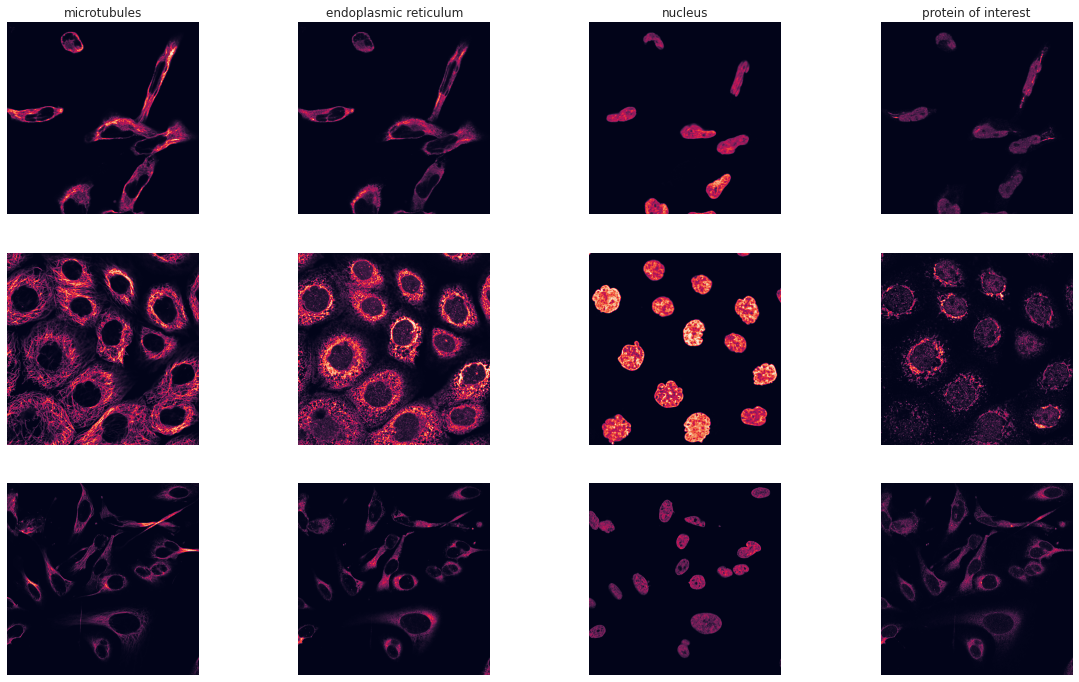

In [78]:
fig, ax = plt.subplots(3,4, figsize=(20,12))
for j in range(3):
    for i in range(4):
        img = plt.imread(images[i][j])
        if j == 0: ax[j,i].set_title(titles[i])
        ax[j,i].imshow(img)
        ax[j,i].axis('off')
plt.show()

### Combining Channels
Visualize using 3 channels: red, yellow, blue.

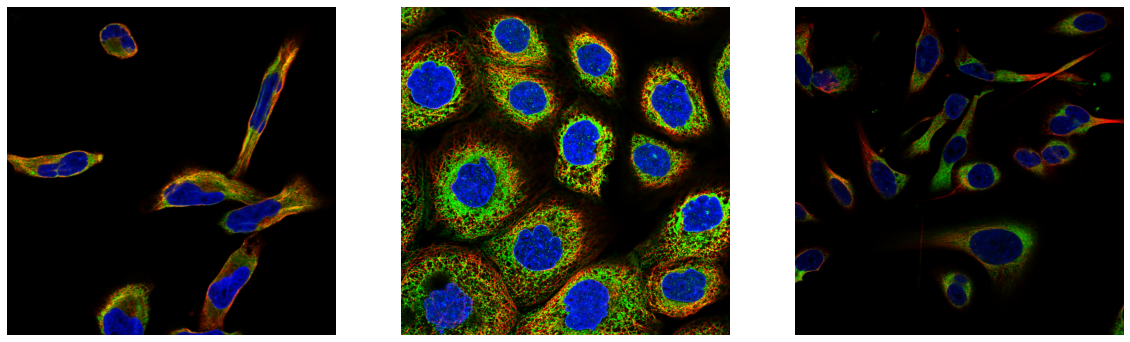

In [79]:
fig, ax = plt.subplots(1,3, figsize=(20,50))
for i in range(3):
    microtubule = plt.imread(mt[i])    
    endoplasmicrec = plt.imread(er[i])    
    nuclei = plt.imread(nu[i])
    img = np.dstack((microtubule, endoplasmicrec, nuclei))
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

Visualize the red, green and blue channels:

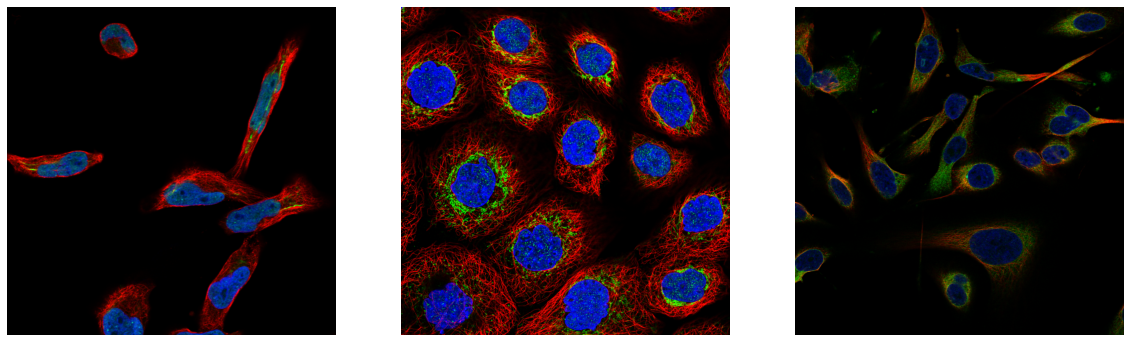

In [80]:
fig, ax = plt.subplots(1,3, figsize=(20,50))
for i in range(3):
    microtubule = plt.imread(mt[i])    
    protein = plt.imread(pr[i])    
    nuclei = plt.imread(nu[i])
    img = np.dstack((microtubule, protein, nuclei))
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()

## Visualize single classes


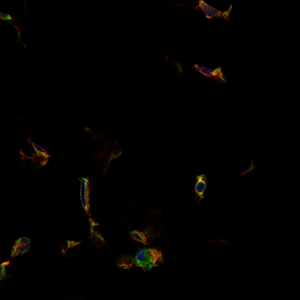
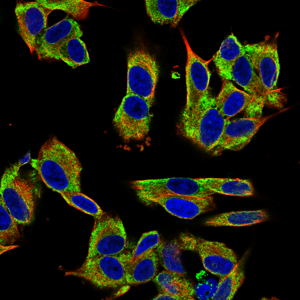
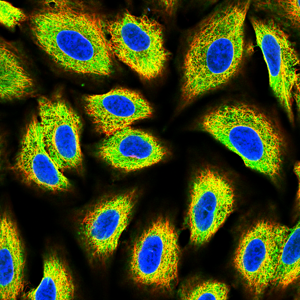
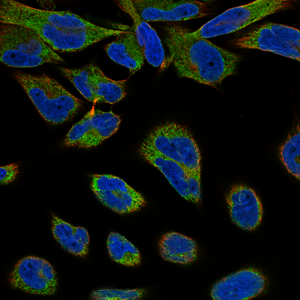
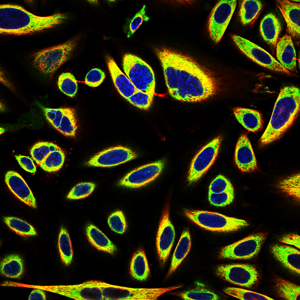
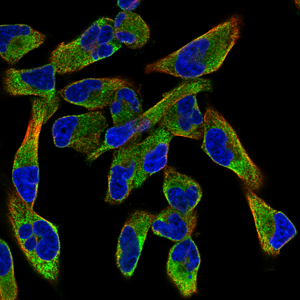
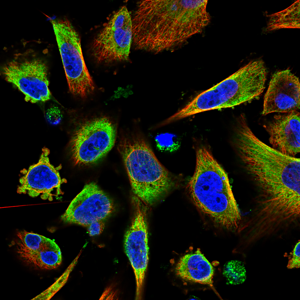
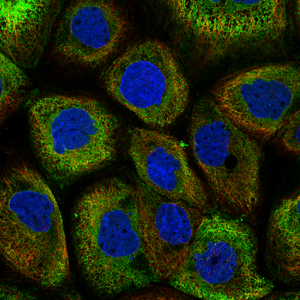
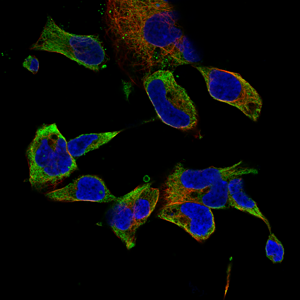
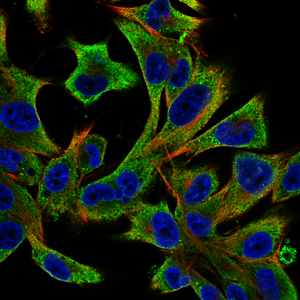
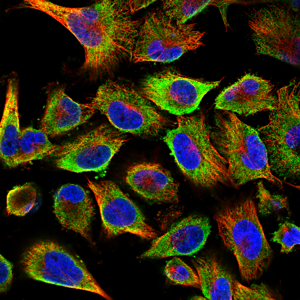
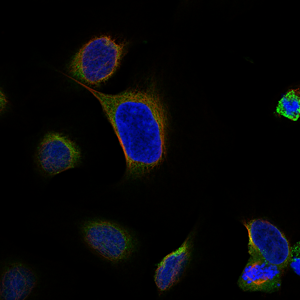
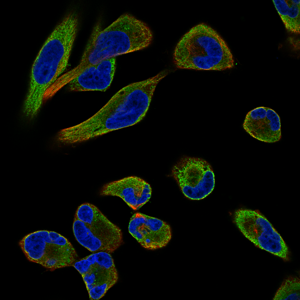
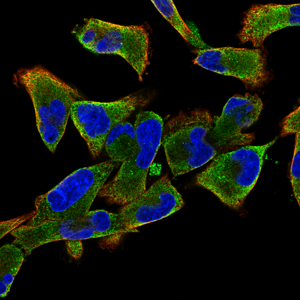
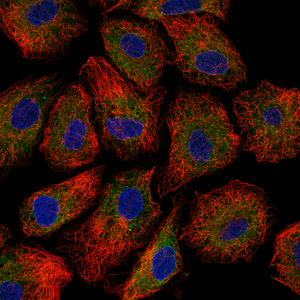
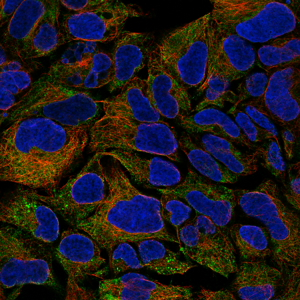
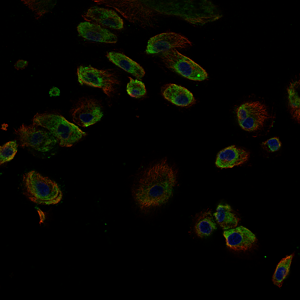
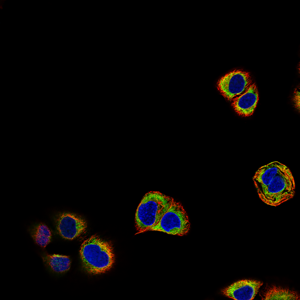
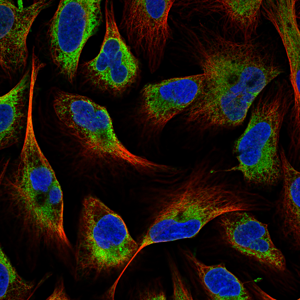


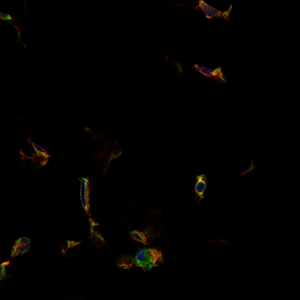
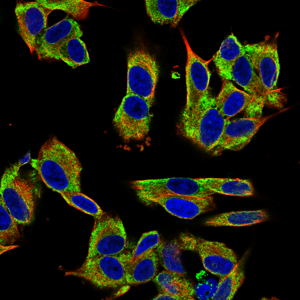
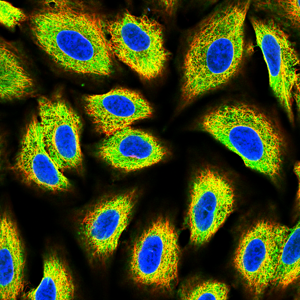
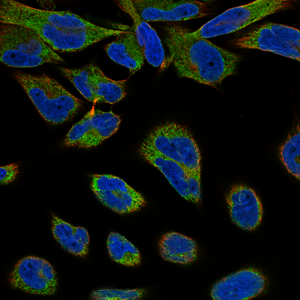
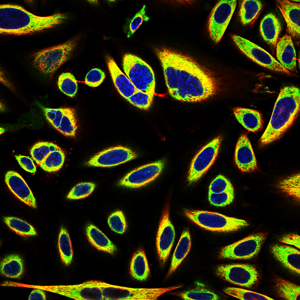
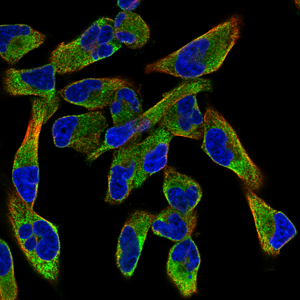
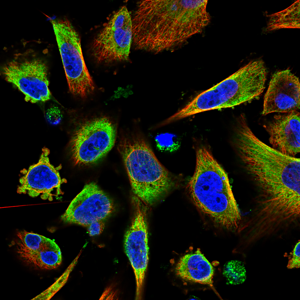
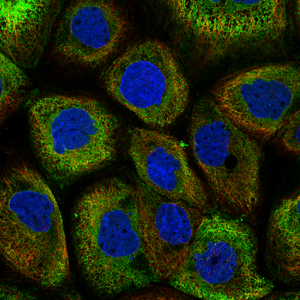
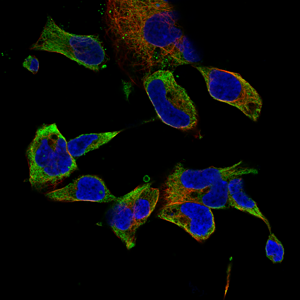
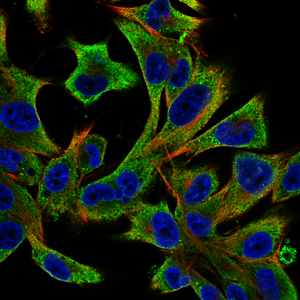
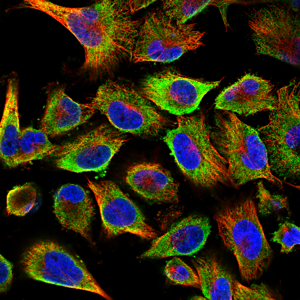
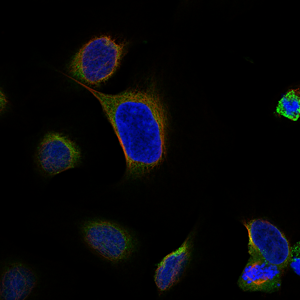
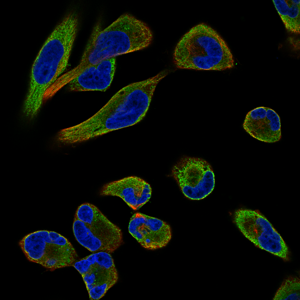
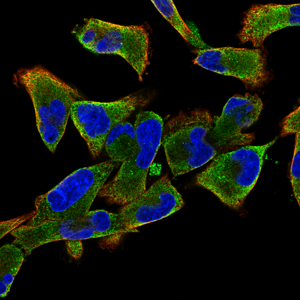
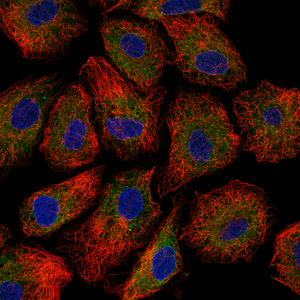
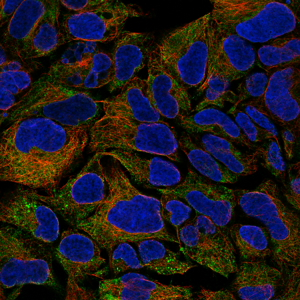
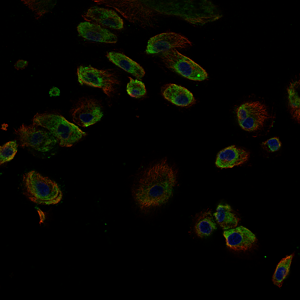
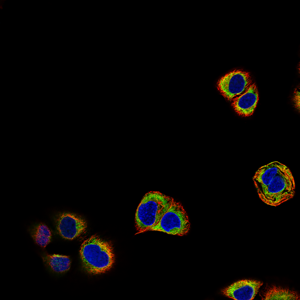
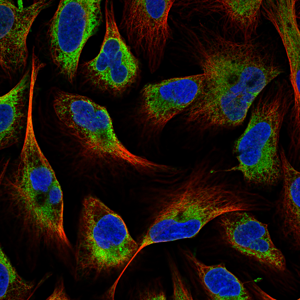

In [85]:

class_images = []
for label in labels:
    r_img = df_train[df_train.Label == label].reset_index(drop=True).ID.loc[0] + '_red.png'
    y_img = df_train[df_train.Label == label].reset_index(drop=True).ID.loc[0] + '_yellow.png'
    b_img = df_train[df_train.Label == label].reset_index(drop=True).ID.loc[0] + '_blue.png'
    r = imageio.imread(path/'train'/r_img)
    y = imageio.imread(path/'train'/y_img)
    b = imageio.imread(path/'train'/b_img)
    rgb = np.dstack((r,y,b))
    class_images.append(PILImage.create(rgb))

ipyplot.plot_images(images=class_images, labels=label_names, max_images=19, img_width=300)
